<a href="https://colab.research.google.com/github/Ksenia-90/NN/blob/lesson_4/Lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример создания сверточных и пуллинг слоев

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D

In [ ]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os

In [ ]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 120
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
def plot_images(images, labels):
  fig, axes = plt.subplots(1, len(images), figsize = (10, 5))
  for im, l, ax in zip(images, labels, axes):
    ax.imshow(im.reshape(32, 32, 3))
    ax.set_title(l.argmax())

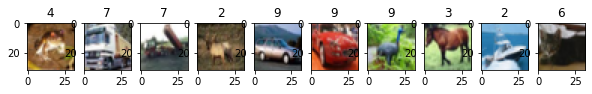

In [ ]:
plot_images(x_train[:10], y_train[10:20])

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.08,
    height_shift_range=0.08,
    horizontal_flip=True)

In [ ]:
dg = datagen.flow(x_train[:5], batch_size=1)

In [ ]:
dg[0]

array([[[[0.3659732 , 0.3162866 , 0.21016687],
         [0.2737802 , 0.23829961, 0.15368655],
         [0.30146766, 0.27339524, 0.19785495],
         ...,
         [0.12788068, 0.10911836, 0.05016239],
         [0.12762901, 0.10873426, 0.04991074],
         [0.12762901, 0.10873426, 0.04991074]],

        [[0.36728644, 0.3019003 , 0.20685866],
         [0.33315164, 0.28987986, 0.18267877],
         [0.3586811 , 0.32724127, 0.2168307 ],
         ...,
         [0.15094756, 0.12422293, 0.05838856],
         [0.15080187, 0.124064  , 0.05811043],
         [0.15080187, 0.124064  , 0.05811043]],

        [[0.39314657, 0.3122066 , 0.22879724],
         [0.3770926 , 0.33255142, 0.20656471],
         [0.40290126, 0.37109163, 0.23625417],
         ...,
         [0.20748922, 0.17660567, 0.10625479],
         [0.20641643, 0.17540044, 0.10516875],
         [0.20641643, 0.17540044, 0.10516875]],

        ...,

        [[0.319851  , 0.2963216 , 0.21325554],
         [0.37542117, 0.34056413, 0.2574981 ]

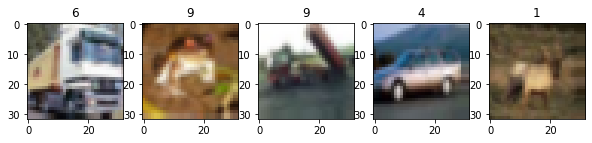

In [ ]:
plot_images(dg, y_train[:5])

In [ ]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='valid', kernel_initializer='he_uniform', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='valid', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [ ]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/120
391/391 [==============================] - 25s 61ms/step - loss: 1.9366 - accuracy: 0.2931 - val_loss: 1.6460 - val_accuracy: 0.4219
Epoch 2/120
391/391 [==============================] - 25s 64ms/step - loss: 1.6369 - accuracy: 0.4046 - val_loss: 1.5149 - val_accuracy: 0.4547
Epoch 3/120
391/391 [==============================] - 23s 60ms/step - loss: 1.5158 - accuracy: 0.4510 - val_loss: 1.3926 - val_accuracy: 0.4953
Epoch 4/120
391/391 [==============================] - 23s 59ms/step - loss: 1.4380 - accuracy: 0.4832 - val_loss: 1.3615 - val_accuracy: 0.5054
Epoch 5/120
391/391 [==============================] - 23s 60ms/step - loss: 1.3830 - accuracy: 0.5051 - val_loss: 1.2868 - val_accuracy: 0.5361
Epoch 6/120
391/391 [==============================] - 23s 60ms/step - loss: 1.3265 - accuracy: 0.5242 - val_loss: 1.2636 - val_accuracy: 0.5503
Epoch 7/120
391/391 [==============================] - 23s 60ms/step - loss: 1.2875 - accuracy: 0.5414 - val_loss: 1.2360 - val_ac

In [ ]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 


In [ ]:

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.5722 - accuracy: 0.8143
Test loss: 0.5722259283065796
Test accuracy: 0.814300000667572
